# Deep Learning - Nasir Hussain - 2021/03/06

# 4 Getting started with neural networks: Classification and regression

## 4.2 Classifying newswires: A multiclass classification example

- multiclass classification
  - single-label multiclass classification
    - each input sample should be categorized into more than two categories
  - multi-label multiclass classification
    - each input sample can be assigned multiple labels  


### 4.2.1 The Reuters dataset

- Reuters dataset
  - set of short newswires and their topics
  - used for test classification
  - 46 topics
    - atleast 10 examples

In [1]:
# Listing 4.11 Loading the Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


- num_words=10000 
  - restricts the data to the 10,000 most frequently occurring words

In [2]:
# shape of data
print("Shape of training data : ",train_data.shape)
print("Shape of training labels : ",train_labels.shape)
print("Shape of testing data : ",test_data.shape)
print("Shape of training labels : ",test_labels.shape)

Shape of training data :  (8982,)
Shape of training labels :  (8982,)
Shape of testing data :  (2246,)
Shape of training labels :  (2246,)


- training data is of length 8982
- test data is of length 2246


In [3]:
# samples of data
import numpy as np
print("1st news from training data : ",train_data[0])
print("1st label from training data : ",train_labels[0])
print("1st news from testing data : ",test_data[0])
print("1st label from testing data : ",test_labels[0])
print("Unique labels : ",np.unique(train_labels))

1st news from training data :  [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
1st label from training data :  3
1st news from testing data :  [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 4

In [4]:
# find max value from sequence
print("Maximum number in any sequence : ",max([max(sequence) for sequence in train_data]))

Maximum number in any sequence :  9999


In [5]:
# Listing 4.12 Decoding newswires back to text
# load word index
word_index = reuters.get_word_index()
# reverse the dic so numbers come first and then word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print("1st news from training data : ",decoded_newswire)

1st news from training data :  ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### 4.2.2 Preparing the data

- as we set the max number of words to 10000, so it is necessary to have all the data of same size
  - vectorize the data to do so

In [6]:
# Listing 4.13 Encoding the input data
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

- vectorize the labels
  - cast the label list as an integer tensor
  - one-hot encoding / categorical encoding
    - embedding each label as an allzero vector with a 1 in the place of the label index.


In [7]:
# Listing 4.14 Encoding the labels
def to_one_hot(labels, dimension=np.unique(train_labels).size):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

- built in method for one hot encoding
  ```.ipynb
  from tensorflow.keras.utils import to_categorical
  y_train = to_categorical(train_labels)
  y_test = to_categorical(test_labels)
  ```

In [8]:
# samples of data
print("1st news from training data after vectorization : ",x_train[0])
print("1st label from training data after vectorization: ",y_train[0])
print("1st news from testing data after vectorization: ",x_test[0])
print("1st label from testing data after vectorization: ",y_test[0])

1st news from training data after vectorization :  [0. 1. 1. ... 0. 0. 0.]
1st label from training data after vectorization:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1st news from testing data after vectorization:  [0. 1. 1. ... 0. 0. 0.]
1st label from testing data after vectorization:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 4.2.3 Building your model

- each layer can only access information present in the output of the previous layer.
- if one layer drops some information relevant to the classification problem, this information can never be recovered by later layers
- each layer can potentially become an information bottleneck.

In [9]:
# Listing 4.15 Model definition
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

- output
  - a 46-dimensional vector
    - Each entry in this vector (each dimension) will encode a different output class.
  - softmax
    - output a probability distribution over the 46 different output classes
- loss function
  - categorical_crossentropy

In [10]:
# Listing 4.16 Compiling the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

### 4.2.4 Validating your approach

- select 1000 samples as validation set

In [11]:
# Listing 4.17 Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

- use 20 apoch

In [12]:
# Listing 4.18 Training the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 58ms/step - loss: 2.6159 - accuracy: 0.5361 - val_loss: 1.7125 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 28ms/step - loss: 1.4145 - accuracy: 0.7080 - val_loss: 1.3017 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0556 - accuracy: 0.7783 - val_loss: 1.1195 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 0.8371 - accuracy: 0.8207 - val_loss: 1.0352 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6698 - accuracy: 0.8539 - val_loss: 0.9568 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.5326 - accuracy: 0.8901 - val_loss: 0.9036 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4263 - accuracy: 0.9112 - val_loss: 0.8920 - val_accuracy: 0.8160
Epoch 8/20
16

In [13]:
# check history object
print("History of model fitting : ")
history_dict = history.history
print(history_dict)
print("dictonary keys : ")
print(history_dict.keys())

History of model fitting : 
{'loss': [2.615912437438965, 1.414499282836914, 1.0555920600891113, 0.8371384739875793, 0.6697941422462463, 0.5326083302497864, 0.42627617716789246, 0.34830474853515625, 0.284557580947876, 0.24535612761974335, 0.20722812414169312, 0.18185973167419434, 0.1626042127609253, 0.15205544233322144, 0.13662931323051453, 0.13065601885318756, 0.12557512521743774, 0.11996189504861832, 0.11258159577846527, 0.11300548911094666], 'accuracy': [0.5360811948776245, 0.7079679369926453, 0.778251051902771, 0.8207216262817383, 0.8539212942123413, 0.8901277780532837, 0.9111751317977905, 0.9268353581428528, 0.9386118650436401, 0.9439989924430847, 0.948509156703949, 0.9507642388343811, 0.9536457061767578, 0.9547732472419739, 0.9569030404090881, 0.9566524624824524, 0.957028329372406, 0.9567777514457703, 0.9567777514457703, 0.9547732472419739], 'val_loss': [1.7125048637390137, 1.3016828298568726, 1.1195275783538818, 1.0352444648742676, 0.9567606449127197, 0.9036373496055603, 0.892002

In [14]:
# Listing 4.19 Plotting the training and validation loss
import matplotlib.pyplot as plt
def plot_loss(historyDic):
  history_dict = historyDic.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)
  plt.clf()
  plt.plot(epochs, loss_values, "bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

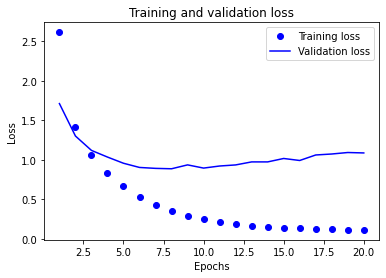

In [15]:
plot_loss(history)

In [16]:
# Listing 4.20 Plotting the training and validation accuracy
def plot_acc(historyDic):
  history_dict = historyDic.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)
  plt.clf()
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

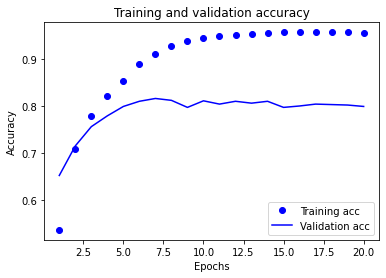

In [17]:
plot_acc(history)

- The model begins to overfit after nine epochs.
- train a new model from scratch for nine epochs and then evaluate it on the test set.

In [18]:
# Listing 4.21 Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.5081 - accuracy: 0.5423
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 1.3681 - accuracy: 0.7105
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.0345 - accuracy: 0.7752
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.8243 - accuracy: 0.8213
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6578 - accuracy: 0.8626
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5254 - accuracy: 0.8923
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4219 - accuracy: 0.9116
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3459 - accuracy: 0.9286
Epoch 9/9
18/18 [==============================] - 0s 15ms/step - loss: 0.2821 - accuracy: 0.9360


In [19]:
# evaluate on test data
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.0029 - accuracy: 0.7760


In [20]:
results

[1.0028505325317383, 0.7760462760925293]

- accuracy of ~80%

- With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%

In [21]:
# accuracy of a random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1709706144256456

- a random classifier would score around 18% classification accuracy, so the results of our model seem pretty good in that light.

### 4.2.5 Generating predictions on new data

- predict method on new samples returns a class probability distribution over all 46 topics for each sample.

In [22]:
# predictions
predictions = model.predict(x_test)
predictions

array([[2.8837530e-05, 6.7533160e-06, 5.1271923e-06, ..., 9.5539053e-06,
        1.3200440e-07, 6.1318860e-07],
       [1.6358773e-03, 1.7279527e-01, 1.1123266e-01, ..., 2.2680401e-06,
        8.8490953e-05, 4.2466022e-04],
       [2.8255391e-03, 7.9416132e-01, 1.2722441e-02, ..., 2.1047473e-03,
        7.0827390e-04, 3.0647749e-03],
       ...,
       [1.4435100e-05, 4.5932702e-05, 2.8841935e-06, ..., 9.6404028e-06,
        5.1958204e-07, 1.9370395e-06],
       [1.4782562e-03, 2.6288005e-02, 9.7392139e-04, ..., 2.2092291e-04,
        7.3542469e-05, 1.1169551e-04],
       [1.1032686e-03, 7.6561064e-01, 1.8683610e-02, ..., 9.5868262e-04,
        3.3863942e-04, 3.6141591e-04]], dtype=float32)

In [23]:
# shape of prediction
predictions[0].shape

(46,)

In [24]:
# Sum of all probabilites of a sample
np.sum(predictions[0])

1.0

In [25]:
# label of 986th sample in x_test
y_test[985]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

- as it is one hot-in-coded form
  - value = 3

In [26]:
# prediction of the 986th sample
predictions[985]

array([2.5432404e-05, 7.6285251e-05, 7.3129318e-06, 9.9719101e-01,
       9.3938690e-04, 2.0659130e-05, 4.5863380e-06, 3.3718239e-05,
       7.9132187e-05, 1.9290672e-05, 2.4386416e-05, 1.3100541e-04,
       6.9260335e-05, 3.7085804e-06, 4.9731748e-06, 5.2494893e-06,
       1.6153776e-04, 1.0686213e-04, 3.9231261e-05, 1.1510526e-04,
       2.1547827e-04, 3.1600106e-05, 3.1376716e-05, 1.6012229e-05,
       3.8682490e-05, 9.5070473e-06, 1.9021450e-05, 8.4452258e-06,
       2.0605061e-05, 2.9959552e-05, 1.5959368e-04, 3.2121497e-05,
       2.8621374e-05, 6.0132857e-06, 8.4859166e-06, 6.0757524e-05,
       2.9216515e-05, 1.3562959e-06, 9.8718279e-05, 4.3551998e-05,
       1.6476582e-05, 3.5964988e-06, 3.6066278e-06, 2.5922292e-05,
       8.4274416e-07, 2.3809228e-06], dtype=float32)

In [27]:
# max probability of the 986th sample
np.max(predictions[985])

0.997191

In [28]:
# index of the max probability
np.argmax(predictions[985])

3

- from predictions and available data predection is correct

### 4.2.6 A different way to handle the labels and the loss

- labels can be casted as follows
```
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```
- when labels are in integer form we can use `sparse_categorical_crossentropy`
```
model.compile(
  optimizer="rmsprop",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])
```

### 4.2.7 The importance of having sufficiently large intermediate layers

In [29]:
# Listing 4.22 A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.6370 - accuracy: 0.4121 - val_loss: 1.8691 - val_accuracy: 0.5680
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.5855 - accuracy: 0.5897 - val_loss: 1.5336 - val_accuracy: 0.5880
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3121 - accuracy: 0.6324 - val_loss: 1.4459 - val_accuracy: 0.6350
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1506 - accuracy: 0.7098 - val_loss: 1.4081 - val_accuracy: 0.6660
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 1.0254 - accuracy: 0.7457 - val_loss: 1.3840 - val_accuracy: 0.6850
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9271 - accuracy: 0.7608 - val_loss: 1.3953 - val_accuracy: 0.6820
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8474 - accuracy: 0.7730 - val_loss: 1.4139 - val_accuracy: 0.6980
Epoch 8/20
63/63 [=

|    Description    |tra_acc|val_acc|tra_loss|val_loss|
|-------------------|-------|-------|--------|--------|
|with out bottleneck|0.95   |0.79    |0.11   |1.0     |
|with bottleneck    |0.88   |0.69    |0.41   |2.05    |
|difference         |-0.07  |-0.10   |-0.30  |-1.05   |


- there is a drop of 10% in accuracy
- This drop is mostly due to the fact that we’re trying to compress a lot of information into an intermediate space that is too low-dimensional.
- The model is able to cram most of the necessary information into these four-dimensional representations, but not all of it.


### 4.2.8 Further experiments

#### Try using smaller layers: 32 units

In [30]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.1585 - accuracy: 0.5913 - val_loss: 1.4656 - val_accuracy: 0.6770
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2254 - accuracy: 0.7241 - val_loss: 1.2092 - val_accuracy: 0.7300
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9300 - accuracy: 0.7904 - val_loss: 1.0890 - val_accuracy: 0.7600
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7178 - accuracy: 0.8395 - val_loss: 1.0101 - val_accuracy: 0.7890
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5583 - accuracy: 0.8713 - val_loss: 0.9611 - val_accuracy: 0.7980
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4379 - accuracy: 0.9067 - val_loss: 0.9380 - val_accuracy: 0.8030
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3505 - accuracy: 0.9236 - val_loss: 0.9392 - val_accuracy: 0.8110
Epoch 8/20
63/63 [=

|Description|tra_acc|val_acc|tra_loss|val_loss|
|-----------|-------|-------|--------|--------|
|64 units   |0.95   |0.79   |0.11   |1.0     |
|32 units   |0.96   |0.79   |0.11   |1.24    |
|difference |+0.01  |0.00   |0.00   |-0.24   |


#### Try using larger layers: 128 units

In [31]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 1.5972 - accuracy: 0.6550 - val_loss: 1.0902 - val_accuracy: 0.7630
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 0.7679 - accuracy: 0.8321 - val_loss: 0.9763 - val_accuracy: 0.7840
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.4597 - accuracy: 0.9003 - val_loss: 0.8566 - val_accuracy: 0.8190
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 0.3046 - accuracy: 0.9313 - val_loss: 0.9397 - val_accuracy: 0.8010
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2289 - accuracy: 0.9444 - val_loss: 0.9165 - val_accuracy: 0.8160
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.1909 - accuracy: 0.9515 - val_loss: 0.9224 - val_accuracy: 0.8130
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.1665 - accuracy: 0.9540 - val_loss: 0.9963 - val_accuracy: 0.8080
Epoch 8/20
63/63 [=

|Description|tra_acc|val_acc|tra_loss|val_loss|
|-----------|-------|-------|--------|--------|
|64 units   |0.95   |0.79   |0.11    |1.00    |
|128 units  |0.95   |0.79   |0.08    |1.58    |
|difference |-0.00  |0.00  |+0.03   |-0.58   |


#### try using a single intermediate layer

In [32]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 1.8681 - accuracy: 0.6452 - val_loss: 1.2190 - val_accuracy: 0.7350
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9378 - accuracy: 0.8026 - val_loss: 0.9817 - val_accuracy: 0.7970
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6335 - accuracy: 0.8700 - val_loss: 0.8621 - val_accuracy: 0.8260
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 0.4472 - accuracy: 0.9088 - val_loss: 0.8221 - val_accuracy: 0.8270
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3358 - accuracy: 0.9302 - val_loss: 0.8111 - val_accuracy: 0.8330
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2600 - accuracy: 0.9412 - val_loss: 0.8308 - val_accuracy: 0.8300
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.2132 - accuracy: 0.9454 - val_loss: 0.8349 - val_accuracy: 0.8260
Epoch 8/20
63/63 [=

|Description|tra_acc|val_acc|tra_loss|val_loss|
|-----------|-------|-------|--------|--------|
|64 units   |0.95   |0.79   |0.11   |1.00     |
|128 units  |0.95   |0.79   |0.10    |1.16    |
|difference |0.00  |0.00  |+0.01   |-0.16  |


#### try using three intermediate layers.

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 1.8925 - accuracy: 0.5926 - val_loss: 1.2847 - val_accuracy: 0.7080
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0028 - accuracy: 0.7781 - val_loss: 1.0739 - val_accuracy: 0.7540
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6742 - accuracy: 0.8489 - val_loss: 0.9291 - val_accuracy: 0.8060
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.4663 - accuracy: 0.8996 - val_loss: 0.9887 - val_accuracy: 0.7930
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3346 - accuracy: 0.9268 - val_loss: 0.9836 - val_accuracy: 0.8070
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2636 - accuracy: 0.9385 - val_loss: 1.0821 - val_accuracy: 0.7850
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.2103 - accuracy: 0.9491 - val_loss: 1.0888 - val_accuracy: 0.7990
Epoch 8/20
63/63 [=

|Description|tra_acc|val_acc|tra_loss|val_loss|
|-----------|-------|-------|--------|--------|
|64 units   |0.95   |0.79   |0.11   |1.0     |
|128 units   |0.95  |0.78  |0.10    |1.46    |
|difference |0.00  |+0.01  |+0.01   |-0.46   |


### 4.2.9 Wrapping up

- If you’re trying to classify data points among N classes, your model should end with a Dense layer of size N.
- In a single-label, multiclass classification problem your model should end with a softmax activation so that it will output a probability distribution over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.
- There are two ways to handle labels in multiclass classification:
  - Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
  - Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
- If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your model due to intermediate layers that are too small.